# Amazon Sales Prediction on Black Friday Product Sales dataset
Problem Statement A retail company “COSTCO” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized recommendations for customers against different products.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [70]:
df= pd.read_csv('train.csv')

In [71]:
df.head() #top 5 records

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.isnull()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,False,False,False,False,False,False,False,False,False,True,True,False
550064,False,False,False,False,False,False,False,False,False,True,True,False
550065,False,False,False,False,False,False,False,False,False,True,True,False
550066,False,False,False,False,False,False,False,False,False,True,True,False


<AxesSubplot:>

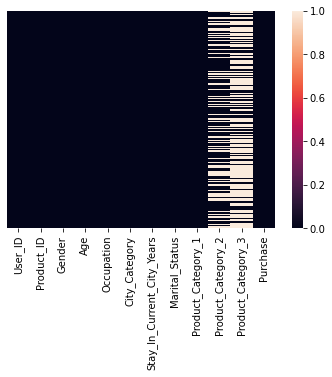

In [5]:
sns.heatmap(df.isnull(),yticklabels=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df.isnull().sum() #count and which columns have null val

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
[feature for feature in df.columns if df[feature].isnull().sum()>0] #which columns have null val

['Product_Category_2', 'Product_Category_3']

In [9]:
dftest=pd.read_csv('test.csv') #reading test data

In [10]:
#merge two sets

new_df=df.append(dftest)
new_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
new_df.drop(['User_ID'], axis=1, inplace=True) #drop userid as its not useful
new_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
#identify categorical variables and convert them to numeric
#Gender Male=1 and Female =0
new_df['Gender']=new_df['Gender'].map({'F':0,'M':1})
new_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
new_df['Age'].unique() #age to numberic, finding out unique age val

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
#pd.get_dummies(df['Age']) might be one way but we need to appen and delete the old column
#Best way to use map function
new_df['Age']=new_df['Age'].map({'0-17':1, '18-25':2, '26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
new_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [72]:
#converting city to numberic
df_city=pd.get_dummies(df['City_Category'],drop_first=True)
df_city.head()


,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [16]:
#concat to orginal df

new_df=pd.concat([new_df,df_city])
new_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,1.0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0,NaN,NaN
1,P00248942,0.0,1.0,10.0,A,2,0.0,1.0,6.0,14.0,15200.0,NaN,NaN
2,P00087842,0.0,1.0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0,NaN,NaN
3,P00085442,0.0,1.0,10.0,A,2,0.0,12.0,14.0,NaN,1057.0,NaN,NaN
4,P00285442,1.0,7.0,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0,NaN,NaN


In [17]:
#drop old category name
new_df.drop('City_Category',axis=1,inplace=True)

In [18]:
new_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,1.0,10.0,2,0.0,3.0,NaN,NaN,8370.0,NaN,NaN
1,P00248942,0.0,1.0,10.0,2,0.0,1.0,6.0,14.0,15200.0,NaN,NaN
2,P00087842,0.0,1.0,10.0,2,0.0,12.0,NaN,NaN,1422.0,NaN,NaN
3,P00085442,0.0,1.0,10.0,2,0.0,12.0,14.0,NaN,1057.0,NaN,NaN
4,P00285442,1.0,7.0,16.0,4+,0.0,8.0,NaN,NaN,7969.0,NaN,NaN


In [19]:
new_df.isnull().sum()

Product_ID                     550068
Gender                         550068
Age                            550068
Occupation                     550068
Stay_In_Current_City_Years     550068
Marital_Status                 550068
Product_Category_1             550068
Product_Category_2             796050
Product_Category_3            1095877
Purchase                       783667
B                              783667
C                              783667
dtype: int64

<AxesSubplot:>

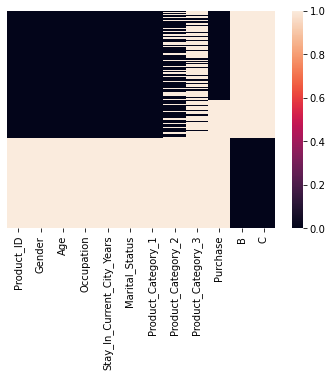

In [20]:
sns.heatmap(new_df.isnull(), yticklabels=False)

In [24]:
#replace missing values with mode (for discrete)
new_df['Product_Category_2'].mode() #finding mode
new_df['Product_Category_2'].mode()[0] #indexing to get only mode value and not 0

8.0

In [28]:
new_df['Product_Category_2']= new_df['Product_Category_2'].fillna(new_df['Product_Category_2'].mode()[0])

In [29]:
new_df['Product_Category_2'].isnull().sum() #to check is missing val got replaced

0

In [30]:
new_df['Product_Category_3'].unique() #unique val of Product_Category_3

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [32]:
new_df['Product_Category_3'].value_counts() #knowing the value counts

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [33]:
new_df['Product_Category_3'].mode()

0    16.0
dtype: float64

In [34]:
new_df['Product_Category_3']=new_df['Product_Category_3'].fillna(new_df['Product_Category_3'].mode()[0])

In [74]:
new_df['Product_Category_3'].isnull().sum()

0

In [73]:
new_df['Product_Category_1'].mode()

0    5.0
dtype: float64

In [38]:
new_df['Product_Category_1']=new_df['Product_Category_1'].fillna(new_df['Product_Category_1'].mode()[0])

In [39]:
new_df['Product_Category_1'].isnull().sum()

0

In [40]:
new_df.isnull().sum()

Product_ID                    550068
Gender                        550068
Age                           550068
Occupation                    550068
Stay_In_Current_City_Years    550068
Marital_Status                550068
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      783667
B                             783667
C                             783667
dtype: int64

In [42]:
new_df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [43]:
new_df['Stay_In_Current_City_Years']=new_df['Stay_In_Current_City_Years'].fillna(new_df['Stay_In_Current_City_Years'].mode()[0])

In [44]:
new_df.isnull().sum()

Product_ID                    550068
Gender                        550068
Age                           550068
Occupation                    550068
Stay_In_Current_City_Years         0
Marital_Status                550068
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      783667
B                             783667
C                             783667
dtype: int64

In [45]:
new_df['Marital_Status'].unique()

array([ 0.,  1., nan])

In [46]:
new_df['Marital_Status']=new_df['Marital_Status'].fillna(new_df['Marital_Status'].mode()[0])
new_df.isnull().sum()

Product_ID                    550068
Gender                        550068
Age                           550068
Occupation                    550068
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      783667
B                             783667
C                             783667
dtype: int64

In [47]:
new_df.shape

(1333735, 12)

In [52]:
new_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,1.0,10.0,2,0.0,3.0,8.0,16.0,8370.0,NaN,NaN
1,P00248942,0.0,1.0,10.0,2,0.0,1.0,6.0,14.0,15200.0,NaN,NaN
2,P00087842,0.0,1.0,10.0,2,0.0,12.0,8.0,16.0,1422.0,NaN,NaN
3,P00085442,0.0,1.0,10.0,2,0.0,12.0,14.0,16.0,1057.0,NaN,NaN
4,P00285442,1.0,7.0,16.0,4,0.0,8.0,8.0,16.0,7969.0,NaN,NaN


In [51]:
new_df['Stay_In_Current_City_Years']= new_df['Stay_In_Current_City_Years'].str.replace('+','') #+4 to 4

/var/folders/hc/qmt_vj3173n7q749wwk377700000gn/T/ipykernel_21478/1980205197.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_df['Stay_In_Current_City_Years']= new_df['Stay_In_Current_City_Years'].str.replace('+','')


In [54]:
#to convert object type to int
new_df['Stay_In_Current_City_Years']=new_df['Stay_In_Current_City_Years'].astype(int)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333735 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Product_ID                  783667 non-null   object 
 1   Gender                      783667 non-null   float64
 2   Age                         783667 non-null   float64
 3   Occupation                  783667 non-null   float64
 4   Stay_In_Current_City_Years  1333735 non-null  int64  
 5   Marital_Status              1333735 non-null  float64
 6   Product_Category_1          1333735 non-null  float64
 7   Product_Category_2          1333735 non-null  float64
 8   Product_Category_3          1333735 non-null  float64
 9   Purchase                    550068 non-null   float64
 10  B                           550068 non-null   float64
 11  C                           550068 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.3+ 

/Users/geethika/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

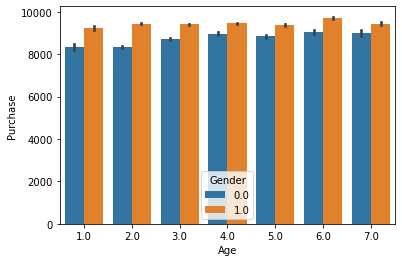

In [56]:
sns.barplot('Age','Purchase', hue='Gender', data=new_df) #viz Age vs Purchase

/Users/geethika/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchase', ylabel='Occupation'>

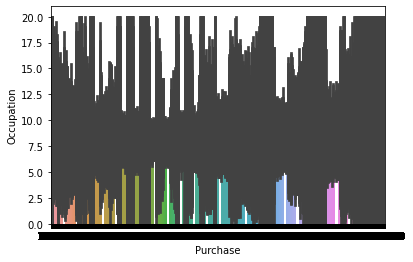

In [75]:
sns.barplot('Purchase','Occupation', data=new_df) #viz 2 purchase and occupation

/Users/geethika/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

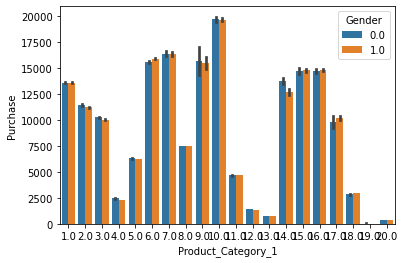

In [76]:
sns.barplot('Product_Category_1','Purchase',hue='Gender', data=new_df) #viz 3 between Category1 and purchase

In [77]:
new_df['Product_ID'].drop #drop product id

<bound method Series.drop of 0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
            ...    
550063          NaN
550064          NaN
550065          NaN
550066          NaN
550067          NaN
Name: Product_ID, Length: 1333735, dtype: object>

In [78]:
new_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,1.0,10.0,2,0.0,3.0,8.0,16.0,8370.0,NaN,NaN
1,P00248942,0.0,1.0,10.0,2,0.0,1.0,6.0,14.0,15200.0,NaN,NaN
2,P00087842,0.0,1.0,10.0,2,0.0,12.0,8.0,16.0,1422.0,NaN,NaN
3,P00085442,0.0,1.0,10.0,2,0.0,12.0,14.0,16.0,1057.0,NaN,NaN
4,P00285442,1.0,7.0,16.0,4,0.0,8.0,8.0,16.0,7969.0,NaN,NaN


In [66]:
new_df['Purchase'].isnull().sum()

783667

In [79]:
new_df[~new_df['Purchase'].isnull()] #to check if not null

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0.0,1.0,10.0,2,0.0,3.0,8.0,16.0,8370.0,NaN,NaN
1,P00248942,0.0,1.0,10.0,2,0.0,1.0,6.0,14.0,15200.0,NaN,NaN
2,P00087842,0.0,1.0,10.0,2,0.0,12.0,8.0,16.0,1422.0,NaN,NaN
3,P00085442,0.0,1.0,10.0,2,0.0,12.0,14.0,16.0,1057.0,NaN,NaN
4,P00285442,1.0,7.0,16.0,4,0.0,8.0,8.0,16.0,7969.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1.0,6.0,13.0,1,1.0,20.0,8.0,16.0,368.0,NaN,NaN
550064,P00375436,0.0,3.0,1.0,3,0.0,20.0,8.0,16.0,371.0,NaN,NaN
550065,P00375436,0.0,3.0,15.0,4,1.0,20.0,8.0,16.0,137.0,NaN,NaN
550066,P00375436,0.0,7.0,1.0,2,0.0,20.0,8.0,16.0,365.0,NaN,NaN


# feature Selection

In [ ]:
from sklearn.model_selection import train_test_split